[View in Colaboratory](https://colab.research.google.com/github/gtambi143/Machine-Learning/blob/master/IrisData_KNN.ipynb)

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

iris = datasets.load_iris()

Text(0.5,1,'Petal length VS Petal Width')

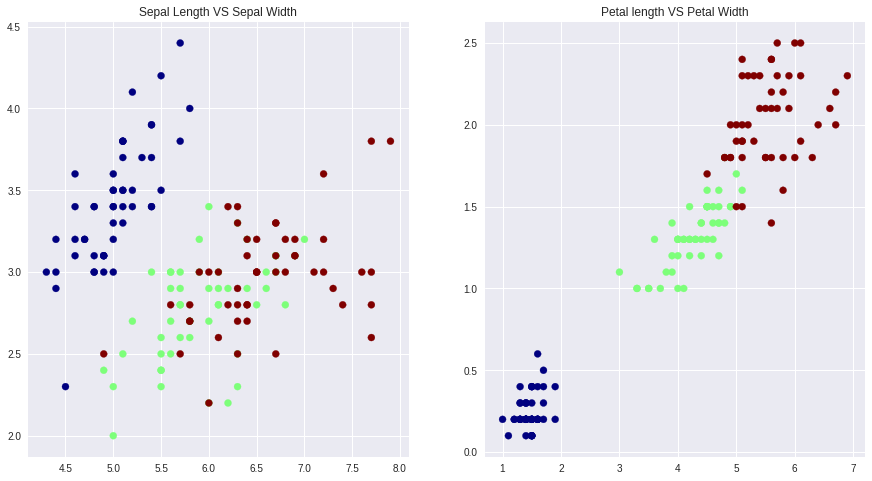

In [7]:


#lets first try to find out the relationship between the variables by looking at the various graphs.
#relation between sepal length and sepal width with respect to the type of flower
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target, cmap = 'jet')
plt.title('Sepal Length VS Sepal Width')


#relation between petal length and petal width
plt.subplot(1,2,2)
plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target, cmap = 'jet')
plt.title('Petal length VS Petal Width')


In [41]:
train_x,test_x,train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.33, random_state=0)


#lets build the model with K=3 and find the accuracy

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_x,train_y)

pred_test_y=knn_model.predict(test_x)

print(metrics.accuracy_score(pred_test_y,test_y))

0.96


The optimal value of K is 7


Text(0,0.5,'MSE')

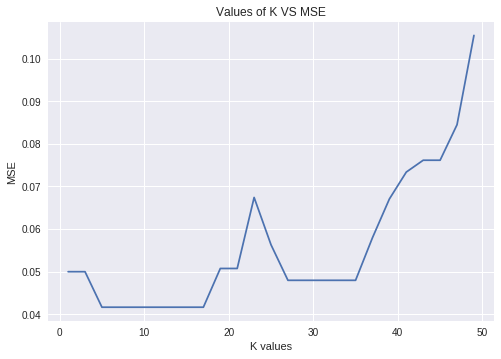

In [43]:
#we will be using cross validation to find out the best value of K to use for this model
k = list(range(1,50))

k_list = list(filter(lambda x : x%2 != 0 , k)) #remember filter in python 3 will not return a list so convert it to list

cv_scores = []

for i in k_list:
  knn_model = KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(knn_model, train_x, train_y,cv=10, scoring = 'accuracy')
  cv_scores.append(scores.mean())

#now we will calculate the misclassification error which is (1-accuracy)
MSE = [1-x for x in cv_scores]

optimal_k = k_list[MSE.index(min(MSE))]
print("The optimal value of K is %d" % optimal_k)

plt.plot(k_list,MSE)
plt.title('Values of K VS MSE')
plt.xlabel('K values')
plt.ylabel('MSE')

